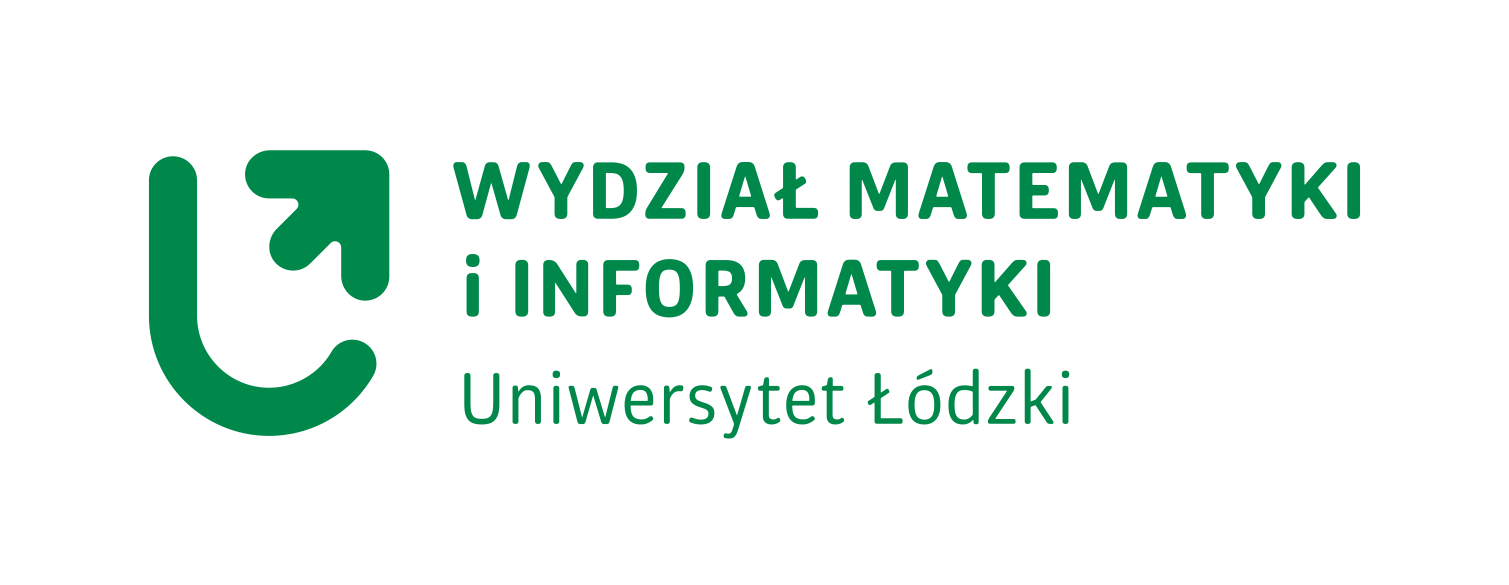

 <center> Temat ćwiczenia: </center>
<center> Drzewa decyzyjne </center>

Sprawozdanie z przedmiotu: **Zaawansowane Metody Eksploracji**
<br>Studia stacjonarne 2-go stopnia
<br>Kierunek: *Analiza danych, sem. 2*
<br>Prowadzący: *prof. dr hab. inż. Grzegorz Dudek*
<br> Data wykonania ćwiczenia: 17.04.2024, 24.04.2024
<br>Data złożenia sprawozdania 07.05.2024
<br> Wykonała: Kinga Lubecka
<br> Nr sekcji: **1.14**


#**A. Cel ćwiczenia**
Celem ćwiczenia jest zapoznanie się z drzewami decyzyjnymi oraz wykorzystanie różnych metod i modeli towarzyszących temu tematu.
<br>
<br>Ten zestaw danych służy do przewidywania, czy pacjent może uzyskać udar na podstawie parametrów wejściowych, takich jak płeć, wiek, różne choroby i stan palenia. Każdy wiersz danych zawiera informacje o pacjencie.
Informacje o atrybutach
<br>1) id: unikalny identyfikator
<br>2) płeć: "Mężczyzna", "kobieta" lub "Inne"
<br>3) wiek: wiek pacjenta
<br>4) Nadciśnienie: 0 jeśli pacjent nie ma nadciśnienia tętniczego, 1 jeśli pacjent ma nadciśnienie tętnicze
<br>5) choroba_serca: 0 jeśli pacjent nie ma chorób serca, 1 jeśli pacjent ma chorobę serca
<br>6) kiedykolwiek_żonaty: "Nie" lub "Tak"
<br>7) work_typ: "dzieci", "Govt_jov", "Nigdy_niepracujący", "Prywatny" lub "Samo_zatrudnienie"
<br>8) Rezydencja_typu: "wiejska" lub "miejska"
<br>9) avg_glucose_level: średni poziom glukozy we krwi
<br>10) bmi: wskaźnik masy ciała
<br>11) palenie_status: "wcześniej palący", "nigdy nie palący", "palący" lub "Nieznany"
<br>12) udar mózgu: 1 jeśli pacjent miał udar lub 0, jeśli nie

#**B)Treść zadania**
1. Zaimportuj niezbędne moduły.
2. Wczytaj dane, dokonaj selekcji danych (każdy student tworzy inny zbiór danych, który składa się z
wylosowanych wierszy danych oryginalnych).
Pobierz dane z https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset
<br>data = pd.read_csv("healthcare-dataset-stroke-data.csv")
<br>nr_gr = ?
<br>r_k = ?
<br>np.random.seed(int(nr_gr*r_k))
<br>q = data.shape
<br>idx = np.random.permutation(q[0]) #permutacja wierszy
<br>data = data.iloc[idx[0:5000],:] #selekcja 5000 losowych wierszy
<br>data.head()
<br>gdzie za nr_gr wstaw numer swojej sekcji a za r_k aktualny rok kalendarzowy.
3. Scharakteryzuj dane (przydatne funkcje: data.describe(), data.info()).
4. Oczyszczanie danych.

* Usuń nieprzydatną kolumnę ‘id’ (data=data.drop('id', axis = 1))
* Znajdź i ew. usuń zduplikowane wiersze (data.duplicated().sum())
* Znajdź atrybuty z brakującymi wartościami (data.isnull().sum())
* Usuń wiersze z brakującymi wartościami (data = data.dropna(axis = 0))
5. Implementacja drzew decyzyjnych w bibliotece sklearn nie akceptuje atrybutów nominalnych. Takie
atrybuty należy zamienić na liczbowe (int64). W tym celu:

* Utwórz nową tabelę z danymi (data2 = pd.DataFrame())
* Przepisz do tej tabeli wszystkie atrybuty liczbowe (np. data2['age'] = data['age'])
* Jeśli atrybut nominalny ma tylko dwie wartości (możesz to sprawdzić funkcją data.nunique(),
data.unique()), zamień te wartości na 0 i 1, np.: data2['ever_married'] =
np.int64(data['ever_married']=='Yes')
* Jeśli atrybut nominalny ma k>2 wartości, utwórz dla niego k nowych atrybutów, np.:
<br>data2['work_type_Private'] = np.int64(data['work_type']=='Private')
<br>data2['work_type_Self_emp'] = np.int64(data['work_type']=='Self-employed')
<br>data2['work_type_Govt_job'] = np.int64(data['work_type']=='Govt_job')
<br>data2['work_type_Children'] = np.int64(data['work_type']=='children')
<br>data2['work_type_Never_worked'] = np.int64(data['work_type']=='Never_worked')
6. Przygotuj dane do uczenia modelu. Utwórz tabele:
* X z przykładami (zawierającą wszystkie kolumny z wyjątkiem ‘stroke’) i
* y z etykietami (kolumna ‘stroke’).
Podziel dane na część treningową (80% danych) i testową (20%). Przeprowadź próbne uczenie modelu.
<br>X = data2.iloc[:, : -1]
<br>y = data2.iloc[:, -1 :]
<br>X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,
random_state = 1)
3
<br>dt = DTC(criterion='entropy', max_depth=5, random_state=1)
<br>dt.fit(X_train, y_train)
<br>y_pred = dt.predict(X_test)
<br>accuracy_score(y_test, y_pred)
7. W procedurze kroswalidacji znajdź optymalną wartość max_depth (wzoruj się na przykładzie podanym na
wykładzie – str. 69). Pokaż wykres zależności dokładności klasyfikacji od max_depth. Odnotuj dokładność
modelu wyznaczoną w kroswalidacji.
8. Przeprowadź uczenie drzewa na zbiorze treningowym z optymalną wartością hiperparametru max_depth
znalezioną w p. 7. Oblicz dokładność klasyfikacji dla danych treningowych i testowych. Narysuj drzewo i
przedstaw je w postaci reguł decyzyjnych:
<br>ax = subplots(figsize=(8,8))[1]
<br>plot_tree(dt,
feature_names=X.columns,
ax=ax);
<br>print(export_text(dt, feature_names=list(X.columns), show_weights=True))
9. Zwizualizuj wyniki za pomocą confusion_matrix.
<br>cm = confusion_matrix(y_test, dt.predict(X_test), labels=dt.classes_)
<br>disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
<br>disp.plot()
<br>plt.show()
<br>Zwróć uwagę, że przykłady z klasy 1 są w większości błędnie klasyfikowane. Pomimo tego dokładność
klasyfikatora jest bardzo wysoka. Wynika to z dysproporcji liczebności klas – liczebność klasy 0 przewyższa
znacznie liczebność klasy 1. Jest to tzw. problem niezbalansowanych danych (imbalanced data). Aby
zwiększyć dokładność klasyfikacji dla klasy mniej licznej, rozwiązaniem może być „rozmnożenie” danych
treningowych dla tej klasy (oversampling).
<br>ros = RandomOverSampler(random_state = 1)
<br>X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)
10. Powtórz p. 7-9 dla danych „rozmnożonych”. Czy osiągnięto poprawę wyników? Które atrybuty są najbardziej
istotne (występują w początkowych węzłach)?
11. Używając drzewa regresyjnego dokonaj predykcji wskaźnika ‘bmi’ na podstawie pozostałych atrybutów
(wliczając atrybut ‘stroke’). W tym celu wykonaj ponownie p. 6-8, odpowiednio je modyfikując.
<br>Wskazówki:
* Zamiast DTC użyj DTR z criterion='squared_error'
* Do oceny modelu zamiast funkcji accuracy_score() użyj mean_squared_error()
* W p. 7 do kroswalidacji użyj następującego wywołania funkcji cross_val_score:
<br>cw[i]= -cross_val_score(dt,
X_train2, y_train2,
cv=10,
scoring='neg_mean_squared_error').mean()
* Pamiętaj, że w kroswalidacji szukamy teraz max_depth, które minimalizuje błąd, a nie tak jak w
klasyfikacji maksymalizuje dokładność.
<br>Dokonaj wizualizacji używając kodu zamieszczonego poniżej i oceń wyniki
<br>ax = subplots(figsize=(6,6))[1]
<br>PredictionErrorDisplay.from_predictions(
<br>y_true=y_test2,
<br>y_pred=dt.predict(X_test2),
<br>#y_true=y_train2,
<br>#y_pred=dt.predict(X_train2),
<br>kind="actual_vs_predicted",
<br>ax=ax,
<br>random_state=0,
)

12. Użyj modelu lasu losowego (RandomForestRegressor) do rozwiązania problemu regresyjnego
postawionego w p. 11. Przyjmij optymalną wartość max_depth z p. 11 i domyślne wartości pozostałych
hiperparametrów z wyjątkiem max_features (liczba atrybutów do przeprowadzenia testu; oznaczony
przez 𝑚 na wykładzie, str. 128 i 129). W kroswalidacji znajdź optymalną wartość hiperparametru
max_features.

13. Użyj modelu boostingowego opartego na drzewach regresyjnych (GradientBoostingRegressor) do
rozwiązania problemu regresyjnego postawionego w p. 11. Przyjmij optymalną wartość max_depth z p. 11
i domyślne wartości pozostałych hiperparametrów z wyjątkiem learning_rate (odpowiednik parametru
zawężania
, patrz wykład str. 130-132). W kroswalidacji znajdź optymalną wartość hiperparametru
learning_rate w zakresie od 0 do 0.1. Porównaj wyniki otrzymane w p. 11-13.

#**C)Opis używanych w ćwiczeniu metod opartych na drzewach decyzyjnych**
**Klasyfikatory drzew decyzyjnych**(DecisionTreeClassifier) to drzewa decyzyjne używane do klasyfikacji. Jak każdy inny klasyfikator, klasyfikatory drzewa decyzyjnego wykorzystują wartości atrybutów/cech danych do stworzenia przewidywania etykiety klasy (dyskretnej). Strukturalnie klasyfikatory drzew decyzyjnych są zorganizowane jak drzewo decyzyjne, w którym proste warunki dotyczące (zwykle pojedynczych) atrybutów oznaczają krawędź pomiędzy węzłem pośrednim a jego dziećmi. Liście są oznaczone przewidywaniami etykiet klas. Zaproponowano wiele metod uczenia się dla klasyfikatorów drzew decyzyjnych. Większość metod obejmuje fazę wzrostu drzewa i przycinania. Rosnące drzewo jest rekurencyjne i polega na wybraniu atrybutu, na podstawie którego nastąpi podział, oraz rzeczywistych warunkach podziału, które następnie powtarzają się na dzieciach, aż dane odpowiadające tej ścieżce będą czyste lub zbyt małe. Faza przycinania eliminuje część dolnej części drzewa, która nauczyła się szumu z danych, aby poprawić uogólnienie.
<br>
<br>**Drzewo decyzyjne regresyjne** (DecisionTreeRegressor)- to drzewo do regresji. Jest to algorytm uczenia maszynowego, który przewiduje ciągłe wartości na podstawie cech wejściowych. Działa poprzez podział danych na podzbiory na podstawie kryterium, takiego jak minimalizacja błędu średniokwadratowego. Następnie rekurencyjnie dzieli te podzbiory, aż osiągnie kryterium zatrzymania. Na końcu każdy liść zawiera wartość przewidywaną dla danego podzbioru. Algorytm jest łatwy do interpretacji, ale może doprowadzić do przeuczenia, dlatego trzeba uważać na zbyt złożone modele. Aby nie doprowadzić do przeuczenia można ustalić wartości kilku hiperparametrów, takich jak np. głębokość drzewa, minimalna liczba próbek na liściu czy liczba liści lub podziałów.
<br>
<br>**Model lasu losowego** (RandomForestRegressor)-Losowy las to metaestymator, który dopasowuje wiele regresorów drzew decyzyjnych do różnych podpróbek zbioru danych i wykorzystuje uśrednianie w celu poprawy dokładności predykcji i nadmiernego dopasowania kontroli. Rozmiar podpróbki jest kontrolowany za pomocą parametru max_samples, jeśli bootstrap=True (domyślnie), w przeciwnym razie do zbudowania każdego drzewa używany jest cały zbiór danych. W lasach losowych każde drzewo w zestawie jest budowane z próbki pobranej z zastąpieniem (tj. próbką startową) ze zbioru uczącego.
Celem  źródeł losowości jest zmniejszenie wariancji estymatora lasu. Rzeczywiście, indywidualne drzewa decyzyjne zazwyczaj wykazują dużą wariancję i mają tendencję do nadmiernego dopasowania. Wstrzyknięta losowość w lasach daje drzewa decyzyjne z nieco oddzielonymi błędami predykcji. Biorąc średnią z tych przewidywań, niektóre błędy mogą zostać wyeliminowane. Losowe lasy osiągają zmniejszoną wariancję poprzez łączenie różnych drzew, czasami kosztem niewielkiego wzrostu odchylenia. W praktyce redukcja wariancji jest często znacząca, co daje ogólnie lepszy model.
<br>
<br>**Model boostingowy**(GradientBoostingRegressor)- GB buduje model addytywny w sposób postępowy i etapowy; pozwala na optymalizację dowolnych różniczkowalnych funkcji strat. Na każdym etapie dopasowuje się drzewo regresji do ujemnego gradientu danej funkcji straty.
To jeden z najpopularniejszych algorytmów dla tabelarycznych zbiorów danych. Jest wystarczająco wydajny, aby znaleźć dowolną nieliniową relację między obiektem docelowym modelu a funkcjami i ma dużą użyteczność, która pozwala poradzić sobie z brakującymi wartościami, wartościami odstającymi i wartościami kategorycznymi o dużej kardynalności.Polega ona na łączeniu wielu słabych klasyfikatorów (zazwyczaj drzew decyzyjnych) w celu stworzenia silnego klasyfikatora.



#**D)Metodyka rozwiązania – poszczególne instrukcje z wynikami i komentarzem**

##Zad1

Importowanie niezbędnych modułów.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.model_selection as skm
from matplotlib.pyplot import subplots
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import PredictionErrorDisplay
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import (DecisionTreeClassifier as DTC,
DecisionTreeRegressor as DTR,
plot_tree,
export_text)
from sklearn.metrics import (accuracy_score,
confusion_matrix,
ConfusionMatrixDisplay,
mean_squared_error)
from sklearn.ensemble import \
(RandomForestRegressor as RF,
GradientBoostingRegressor as GBR)

##Zad2

Wczytywanie danych.

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/healthcare-dataset-stroke-data.csv')
nr_gr = 1.14
r_k = 2024
np.random.seed(int(nr_gr*r_k))
q = data.shape
idx = np.random.permutation(q[0]) #permutacja wierszy
data = data.iloc[idx[0:5000],:] #selekcja 5000 losowych wiersz

#Zad3

Eksploracja danych.

In [ ]:
data.describe(include = 'all')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5000.000000,5000,5000.000000,5000.000000,5000.000000,5000,5000,5000,5000.000000,4802.000000,5000,5000.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2929,NaN,NaN,NaN,3276,2867,2539,NaN,NaN,1850,NaN
mean,36449.601400,NaN,43.236152,0.097400,0.054200,NaN,NaN,NaN,106.041410,28.872803,NaN,0.049200
std,21116.862505,NaN,22.642188,0.296531,0.226435,NaN,NaN,NaN,45.371319,7.844117,NaN,0.216307
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17737.500000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.077500,23.500000,NaN,0.000000
50%,36839.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.680000,28.000000,NaN,0.000000
75%,54396.500000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.012500,33.100000,NaN,0.000000


Funkcja describe() generuje statystyki opisowe dla kolumn, takie jak: ilość, średnia, odchylenie standardowe, wartość minimalną, maksymalną czy też poszczególne kwartyle. Możemy odczytać np wiek najstarszej badanej osoby oraz najmłodszej czy też średnią wieku tych osób, która tutaj wynosi ≃ 43 lata. Już tutaj możemy również zauważyć, że ilość wierszy 'bmi' jest mniejsza niż pozostałych atrybutów.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, 587 to 470
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5000 non-null   int64  
 1   gender             5000 non-null   object 
 2   age                5000 non-null   float64
 3   hypertension       5000 non-null   int64  
 4   heart_disease      5000 non-null   int64  
 5   ever_married       5000 non-null   object 
 6   work_type          5000 non-null   object 
 7   Residence_type     5000 non-null   object 
 8   avg_glucose_level  5000 non-null   float64
 9   bmi                4802 non-null   float64
 10  smoking_status     5000 non-null   object 
 11  stroke             5000 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 507.8+ KB


funkcja info() wypisuje informacje o ilości wierszy w poszczególnych kolumnach oraz zwraca ich typ. Stąd możemy się dowiedzieć, czy czegoś mamy za dużo, za mało, czy może jest potrzebna zmiana typu jakiś danych.

#Zad4

Oczyszczanie danych.

In [ ]:
data.shape    #rozmiar danych

(5000, 12)

In [ ]:
data=data.drop('id', axis = 1)     #usuwanie jednej kolumny 'id' niepotrzebnej do dalszej analizy

In [ ]:
data.shape

(5000, 11)

In [ ]:
data.duplicated().any()

False

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  198
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
data = data.dropna(subset=['bmi'])
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
587,Female,47.0,0,0,Yes,Self-employed,Urban,141.23,21.1,never smoked,0
830,Male,2.0,0,0,No,children,Rural,109.10,20.0,Unknown,0
4466,Female,12.0,0,0,No,children,Rural,70.13,17.8,Unknown,0
2246,Female,76.0,0,0,Yes,Private,Rural,96.24,25.4,never smoked,0
4013,Male,44.0,1,0,Yes,Private,Rural,91.28,26.5,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...
2046,Female,52.0,0,0,Yes,Private,Urban,120.25,28.2,Unknown,0
1125,Female,59.0,1,0,No,Private,Rural,57.26,23.5,never smoked,0
2001,Female,25.0,0,0,Yes,Private,Rural,97.52,45.5,formerly smoked,0
2964,Female,39.0,0,0,Yes,Private,Rural,102.51,26.6,smokes,0


W tym zadaniu usunęłam niepotrzebną kolumnę 'id', sprawdziłam rozmiar przed i po, czy zgadza się z ilością, której oczekiwałam. Funkcją duplicated() sprawdziłam, czy występują duplikaty ( gdyby występowały, należałoby je usunąć). Funkcją insull().sum sprawdziłam ilość brakujących wierszy a następnie usunęłam dropną te brakujące wiersze, tak aby w każdym wierszu i w każdej kolumnie nie było wartości pustych niezdatnych do analizy.

#Zad5

In [ ]:
data2 = pd.DataFrame()

In [ ]:
data2['age'] = data['age']
data2['avg_glucose_level'] = data['avg_glucose_level']
data2['bmi'] = data['bmi']
data2['hypertension'] = data['hypertension']
data2['heart_disease'] = data['heart_disease']
data2['stroke'] = data['stroke']

In [ ]:
data.nunique()

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3777
bmi                   415
smoking_status          4
stroke                  2
dtype: int64

In [ ]:
data2['ever_married'] = np.int64(data['ever_married']=='Yes')
data2['Residence_type'] = np.int64(data['Residence_type']=='Yes')


In [ ]:
data['work_type'].unique()

array(['Self-employed', 'children', 'Private', 'Govt_job', 'Never_worked'],
      dtype=object)

In [ ]:
data2['work_type_Private'] = np.int64(data['work_type']=='Private')
data2['work_type_Self_emp'] = np.int64(data['work_type']=='Self-employed')
data2['work_type_Govt_job'] = np.int64(data['work_type']=='Govt_job')
data2['work_type_Children'] = np.int64(data['work_type']=='children')
data2['work_type_Never_worked'] = np.int64(data['work_type']=='Never_worked')

In [ ]:
data['smoking_status'].unique()

array(['never smoked', 'Unknown', 'smokes', 'formerly smoked'],
      dtype=object)

In [ ]:
data2['smoking_status_Never'] = np.int64(data['smoking_status']=='never smoked')
data2['smoking_status_Unkown'] = np.int64(data['smoking_status']=='unkown')
data2['smoking_status_smokes'] = np.int64(data['smoking_status']=='smokes')
data2['smoking_status_formsm'] = np.int64(data['smoking_status']=='formerly smoked')

In [ ]:
data['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [ ]:
data2['gender_Female'] = np.int64(data['gender']=='Female')
data2['gender_Male'] = np.int64(data['gender']=='Male')
data2['gender_Other'] = np.int64(data['gender']=='Other')

In [ ]:
data2

,age,avg_glucose_level,bmi,hypertension,heart_disease,stroke,ever_married,Residence_type,work_type_Private,work_type_Self_emp,work_type_Govt_job,work_type_Children,work_type_Never_worked,smoking_status_Never,smoking_status_Unkown,smoking_status_smokes,smoking_status_formsm,gender_Female,gender_Male,gender_Other
587,47.0,141.23,21.1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0
830,2.0,109.10,20.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4466,12.0,70.13,17.8,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
2246,76.0,96.24,25.4,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0
4013,44.0,91.28,26.5,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2046,52.0,120.25,28.2,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0
1125,59.0,57.26,23.5,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
2001,25.0,97.52,45.5,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0
2964,39.0,102.51,26.6,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0


In [ ]:
data2.shape

(4802, 20)

W tym zadaniu utowrzyłam nową ramkę do której przypisałam dane numeryczne, a te które nie były numeryczne wcześniej (object) zamieniłam na numeryczne (int64). Funkcją data.nunique() sprawdziłam ile i jakie zmienne ma w sobie zawarta poszczególna kolumna, następnie zamieniłam je również na typ numeryczny i "namnożyłam" kolumnm w ten sposób przypisując 0 i 1. Na koniec wyświetlam ramkę i odczytuje jej kształt. Teraz mam 4802 wierszy i 20 kolumn.

#Zad6

Modelowanie.

In [ ]:
X = data2.drop('stroke', axis =1)
y = data2['stroke']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,
random_state = 1)
dt = DTC(criterion='entropy', max_depth=5, random_state=1)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
accuracy_score(y_test, y_pred)

0.9479708636836629

Utworzylam tabele X z etykietami poza 'stroke' oraz tabelę Y wyłącznie z wartościami 'stroke'. Następnie podzieliłam dane na zbiór treningowy (80%) oraz zbiór testowy(20%). Zainicjalizowałam klasyfikator drzewa losowego, a następnie przeprowadziłam uczenie tego modelu na zbiorze treningowym. Na koniec zwracam dokładność, która jest równa ≃ 94,80 %.

#Zad7

In [ ]:
cw=[0]*10   #lista wynikow kroswalicacji
md=[0]*10
cw_max=0             #najwiekszy wynik dokladnosci; srednia z walidacji krzyzowej
for i in range(10):
  md[i]=i+2;
  clf = DTC(criterion='entropy',max_depth=md[i],random_state=0)    #clf- klasyfikator drzewa decyzyjnego
  cw[i]=cross_val_score(clf, X, y, cv=10).mean()   #srednia dokladnosc
  if i>0 and cw[i]>=cw_max:
    cw_max=cw[i]
    md_opt=md[i]   #optymalna wartosc maksymalnej glebokosci drzewa decyzyjnego
    #dla której uzyskano najwyższą średnią dokładność podczas walidacji krzyżowej.

In [ ]:
md_opt

3

In [ ]:
cw_max

0.9568931912681913

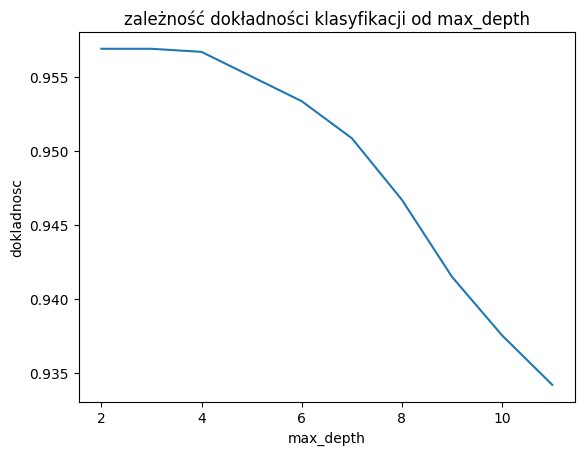

In [ ]:
plt.plot(md,cw)
plt.xlabel('max_depth')
plt.ylabel('dokladnosc')
plt.title('zależność dokładności klasyfikacji od max_depth')
plt.show()

Optymalna wartosc max_depth (maksymalna glebokosc) drzewa decyzyjnego, dla której uzyskano najwyższą średnią dokładność podczas walidacji krzyżowej jest rowna 3.
 Dokladnosc: 0.9568931912681913. Oznacza to, że w prawie 96% przypadków model dobrze zaklasyfikował i przewidział dostanie udaru u pacjenta.
 <br>Możliwe jest przycinanie drzewa, aby uniknąć przeuczenia. Przycinanie polega na usuwaniu podziałów dolnego poziomu, niewpływających istotnie na dokładność drzewa. Przycinanie może pomóc w uproszczeniu drzewa, ułatwiając jego interpretację. Domyślna maksymalna głębokość drzewa jest równa 5, w moim przypadku najoptymalniej jest obciąć do 3.

#Zad8

Uczenie drzewa na zbiorze treningowym z max_depth = 3.

In [ ]:
dt = DTC(criterion='entropy', max_depth=3, random_state=1)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)
y_pred_train = dt.predict(X_train)
train_acc = accuracy_score(y_train, y_pred_train)
print("Dokladnosc klasyfikacji dla danych treningowych: ", train_acc)
print("Dokladnosc klasyfikacji dla danych testowych: ",test_acc)

Dokladnosc klasyfikacji dla danych treningowych:  0.9588648789377766
Dokladnosc klasyfikacji dla danych testowych:  0.9490114464099896


|--- age <= 53.50
|   |--- age <= 37.50
|   |   |--- smoking_status_smokes <= 0.50
|   |   |   |--- weights: [1368.00, 0.00] class: 0
|   |   |--- smoking_status_smokes >  0.50
|   |   |   |--- weights: [180.00, 1.00] class: 0
|   |--- age >  37.50
|   |   |--- avg_glucose_level <= 64.17
|   |   |   |--- weights: [63.00, 5.00] class: 0
|   |   |--- avg_glucose_level >  64.17
|   |   |   |--- weights: [841.00, 16.00] class: 0
|--- age >  53.50
|   |--- age <= 67.50
|   |   |--- avg_glucose_level <= 104.47
|   |   |   |--- weights: [455.00, 15.00] class: 0
|   |   |--- avg_glucose_level >  104.47
|   |   |   |--- weights: [257.00, 27.00] class: 0
|   |--- age >  67.50
|   |   |--- avg_glucose_level <= 126.84
|   |   |   |--- weights: [368.00, 50.00] class: 0
|   |   |--- avg_glucose_level >  126.84
|   |   |   |--- weights: [151.00, 44.00] class: 0



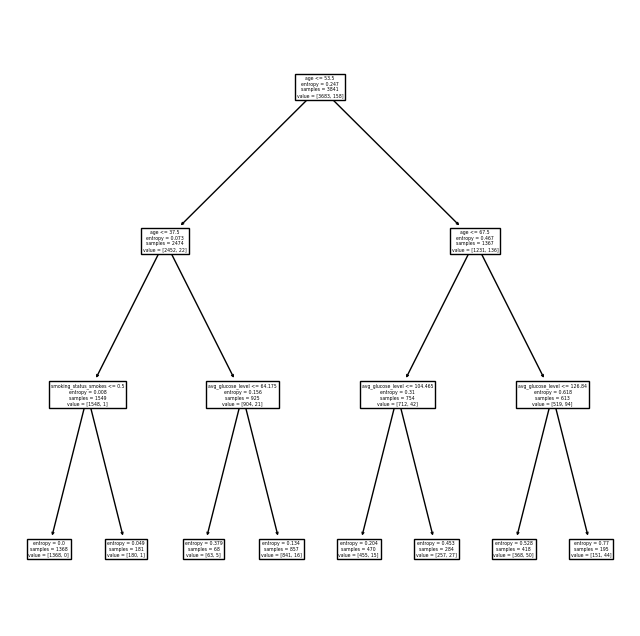

In [ ]:
ax = subplots(figsize=(8,8))[1]
plot_tree(dt,
feature_names=X.columns,
ax=ax);
print(export_text(dt,
feature_names=list(X.columns),
show_weights=True))

Drzewo przedstawia korzeń (pierwszy od góry), liście(na samym dole) oraz węzły. Głębokośc jest równą 3, czyli najdłuższa ścieżka od korzenia do liścia. Drzewo zostało obcięte, gdyż następne cechy mogłyby powodować ryzyko przeuczenia.

#Zad9

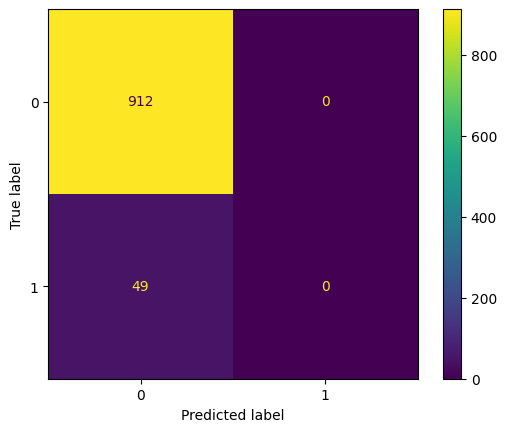

In [ ]:
cm = confusion_matrix(y_test, dt.predict(X_test), labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
disp.plot()
plt.show()

Macierz pomyłek stosowana jest do oceny jakości klasyfikacji. Kolumny reprezentują przewidywane klasy, natomiast wiersze rzeczywiste klasy. W moim modelu 912 obserwacji zostało poprawnie zaklasyfikikowanych oraz 49 zostało zaklasyfikikowanych do "false negative", czyli, że model uznał, że badani nie dostaną udaru, jednakże w rzeczywistości może być/ było inaczej. Nie ma żadnego wystąpienia "false positive" oraz "true positive".

Oversampling

In [ ]:
ros = RandomOverSampler(random_state =1 )
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

Niezbalansowane (czy inaczej niezrównoważone) dane zazwyczaj odnoszą się do problemu z klasyfikacją, gdzie klasy nie są jednakowo reprezentowane. Aby poradzić sobie z problemem niezbalansowania danych możemy skorzystać z oversamplingu(rozmnożenia danych), czyli sztucznego dodania danych do mniej licznego zbioru danych, aby zrównoważyć liczbę wystąpień w każdej klasie. Można to zrobić za pomocą losowania ze zwracaniem lub użyć obecnego zbioru i dodać do niego szum losowy.

#Zad10

In [ ]:
cw=[0]*25   #lista wynikow kroswalicacji
md=[0]*25
cw_max=0             #najwiekszy wynik dokladnosci; srednia z walidacji krzyzowej
for i in range(25):
  md[i]=i+2;
  clf = DTC(criterion='entropy',max_depth=md[i],random_state=0)    #clf- klasyfikator drzewa decyzyjnego
  cw[i]=cross_val_score(clf, X_train_resampled, y_train_resampled, cv=10).mean()   #srednia dokladnosc
  if i>0 and cw[i]>=cw_max:
    cw_max=cw[i]
    md_opt=md[i]   #optymalna wartosc maksymalnej glebokosci drzewa decyzyjnego
    #dla której uzyskano najwyższą średnią dokładność podczas walidacji krzyżowej.

In [ ]:
cw_max

0.9797736859182347

W niemalże 98% przypadków model dobrze przewidziałpojawienie się bądź brak udaru u pacjenta.

In [ ]:
md_opt

22

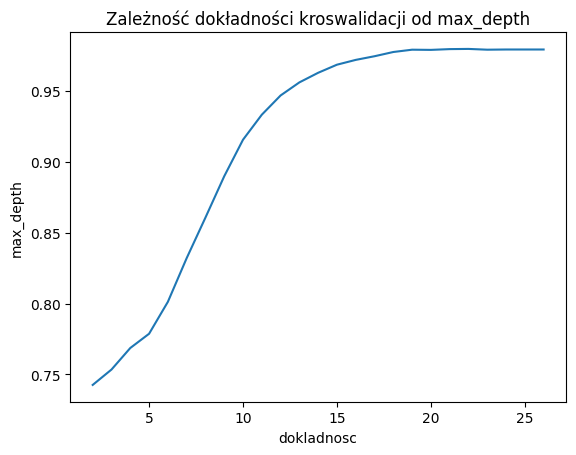

In [ ]:
plt.plot(md,cw)
plt.xlabel('dokladnosc')
plt.ylabel('max_depth')
plt.title('Zależność dokładności kroswalidacji od max_depth')
plt.show()

Optymalna wartosc max_depth (maksymalna glebokosc) drzewa decyzyjnego, dla której uzyskano najwyższą średnią dokładność podczas walidacji krzyżowej jest rowna 22. Dokladnosc: 0.9797736859182347 ≃ 98%, czyli wzrosła w porównaniu do danych przez rozmożeniem.

In [ ]:
dt = DTC(criterion='entropy', max_depth=22, random_state=1)
dt.fit(X_train_resampled, y_train_resampled)
y_pred = dt.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)
y_pred_train = dt.predict(X_train_resampled)
train_acc = accuracy_score(y_train_resampled, y_pred_train)
print("Dokladnosc klasyfikacji dla danych treningowych: ", train_acc)
print("Dokladnosc klasyfikacji dla danych testowych: ",test_acc)

Dokladnosc klasyfikacji dla danych treningowych:  0.9989139288623404
Dokladnosc klasyfikacji dla danych testowych:  0.9105098855359001


Po użyciu wskazanego hiperparametru max_depth=22 dokładność dla danych treningowych jest bardzo wysoka, co może wskazywać na nadmierne dopasowanie lub bardzo dużą złożoność. Jest natomiast wyższa niż dokładność na zbiorze testowym. Warto wspomnieć, że głębokość drzewa=22 to bardzo duża wartość, dzięki czemu można skłaniać się jednak ku tezie nadmiernego dopasowania.

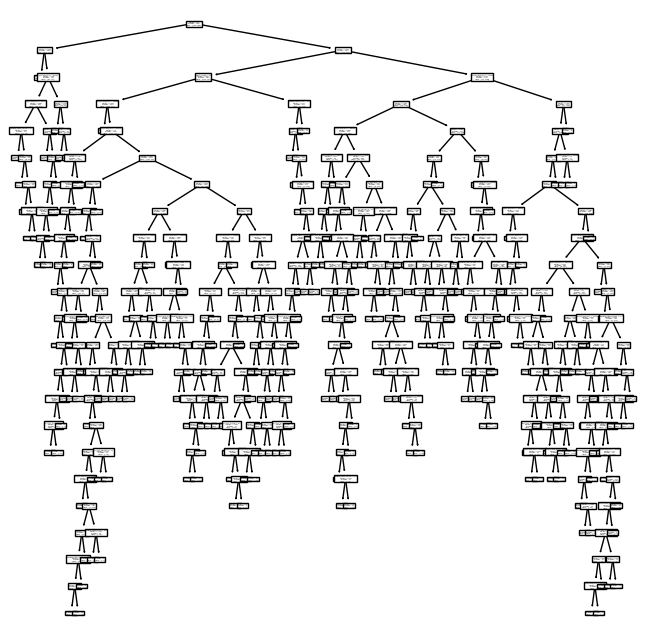

In [ ]:
ax = subplots(figsize=(8,8))[1]
plot_tree(dt,
feature_names=X.columns,
ax=ax)
#print(export_text(dt,
#feature_names=list(X.columns),
#show_weights=True))
plt.show()

Samo drzewo jest mało czytelne.

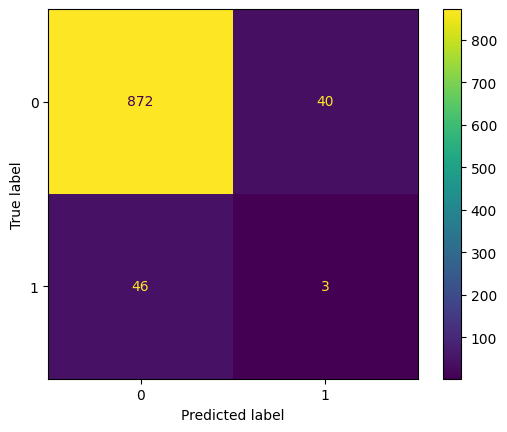

In [ ]:
cm = confusion_matrix(y_test, dt.predict(X_test), labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
disp.plot()
plt.show()

Ponieważ dokładność zbioru treningowego wzrosła, natomiast testowego zmalała nie osiągnięto znacznej poprawy. Kolejny czynnik wskazujący na nadmierne dopasowanie. 40 osób zostało zaklasyfikowanych do klasy, której mogą dostać udar pomimo braku istotnych czynników na to wpływających. Zmniejszyła się natomiast liczebność osób o 3, dla których model przewidział, że nie dostaną udaru, pomimo rzeczywistych przesłanek sugerujących pojawienie się udatru.

In [ ]:
feature_importances = dt.feature_importances_

# Pobranie nazw cech z DataFrame (przy założeniu, że użyto DataFrame w treningu modelu)
feature_names = X_train_resampled.columns

# Poniższy kod wyświetli nazwy atrybutów wraz z ich istotnością
for i, (name, importance) in enumerate(zip(feature_names, feature_importances)):
    print(f"Atrybut {name}: Istotność = {importance}")

Atrybut age: Istotność = 0.4306087898212373
Atrybut avg_glucose_level: Istotność = 0.24770870279327054
Atrybut bmi: Istotność = 0.1746981230599582
Atrybut hypertension: Istotność = 0.009942649812415971
Atrybut heart_disease: Istotność = 0.013150029291197747
Atrybut ever_married: Istotność = 0.019470507943428715
Atrybut Residence_type: Istotność = 0.0
Atrybut work_type_Private: Istotność = 0.012738381796382403
Atrybut work_type_Self_emp: Istotność = 0.008690125824216757
Atrybut work_type_Govt_job: Istotność = 0.013071968743878875
Atrybut work_type_Children: Istotność = 0.0
Atrybut work_type_Never_worked: Istotność = 0.0
Atrybut smoking_status_Never: Istotność = 0.017512499543273444
Atrybut smoking_status_Unkown: Istotność = 0.0
Atrybut smoking_status_smokes: Istotność = 0.02275239028346856
Atrybut smoking_status_formsm: Istotność = 0.017358488045788337
Atrybut gender_Female: Istotność = 0.00037164016782502895
Atrybut gender_Male: Istotność = 0.011925702873658208
Atrybut gender_Other: Is

Najbardziej istotne atrybuto to kolejno: **age, avg_glucose_level** oraz **bmi**. Można to było również odczytać wcześniej z drzewa, bez konieczności pisania tych linijek kodu(może bardziej z opisu, nie z samego obrazka).

#Zad11

In [ ]:
X2 = data2.drop('bmi', axis =1)
y2 = data2['bmi']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2,y2, test_size = 0.2,
random_state = 1)
rt = DTR(criterion='squared_error', max_depth=5, random_state=0)
rt.fit(X_train2, y_train2)
y_pred2 = rt.predict(X_test2)
mean_squared_error(y_test2, y_pred2)

48.50451865532094

In [ ]:
cw=[0]*20   #lista wynikow kroswalicacji
md=[0]*20
cw_min=float('inf')             #najwiekszy wynik dokladnosci; srednia z walidacji krzyzowej
for i in range(20):
  md[i]=i+2;                  #zakres max glebokosci od 2 do 21
  rt = DTR(criterion='squared_error',max_depth=md[i],random_state=0)    #rt- regresor drzewa decyzyjnego
  cw[i]=-cross_val_score(rt, X_train2, y_train2, cv=10, scoring='neg_mean_squared_error').mean()   #srednia dokladnosc
  #if i==0 and cw[i]<cw_max:
  if cw[i]<=cw_min:
    cw_min=cw[i]
    md_opt=md[i]   #optymalna wartosc maksymalnej glebokosci drzewa decyzyjnego
    #dla której uzyskano najwyższą średnią dokładność podczas walidacji krzyżowej.

In [ ]:
cw_min  #najmniejsza wartość błędu średniokwadratowego

45.697479153351786

In [ ]:
md_opt

4

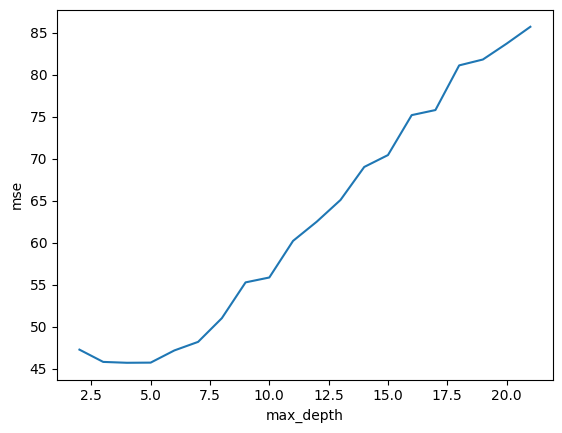

In [ ]:
plt.plot(md,cw)
plt.xlabel('max_depth')
plt.ylabel('mse')
plt.show()

In [ ]:
rt2 = DTR(criterion='squared_error', max_depth = 4, random_state=0)
rt2.fit(X_train2, y_train2)
y_pred2 = rt2.predict(X_test2)
mse_test = mean_squared_error(y_test2, y_pred2)
print("Błąd średniokwadratowy na zbiorze testowym: ", mse_test)

Błąd średniokwadratowy na zbiorze testowym:  46.745754630768786


Z głębokością równą 4 błąd średniokwadratowy wyszedł lepiej, niż z domyślną głębokością.

In [ ]:
y_pred2_train = rt2.predict(X_train2)
mse_train = mean_squared_error(y_train2, y_pred2_train)
print("Błąd średniokwadratowy na zbiorze treningowym: ", mse_train)

Błąd średniokwadratowy na zbiorze treningowym:  43.78663261926625


|--- work_type_Children <= 0.50
|   |--- avg_glucose_level <= 191.74
|   |   |--- age <= 26.50
|   |   |   |--- bmi <= 0.50
|   |   |   |   |--- value: [27.18]
|   |   |   |--- bmi >  0.50
|   |   |   |   |--- value: [48.74]
|   |   |--- age >  26.50
|   |   |   |--- age <= 73.50
|   |   |   |   |--- value: [30.65]
|   |   |   |--- age >  73.50
|   |   |   |   |--- value: [28.10]
|   |--- avg_glucose_level >  191.74
|   |   |--- age <= 68.50
|   |   |   |--- age <= 33.50
|   |   |   |   |--- value: [30.13]
|   |   |   |--- age >  33.50
|   |   |   |   |--- value: [35.86]
|   |   |--- age >  68.50
|   |   |   |--- ever_married <= 0.50
|   |   |   |   |--- value: [35.95]
|   |   |   |--- ever_married >  0.50
|   |   |   |   |--- value: [30.84]
|--- work_type_Children >  0.50
|   |--- age <= 10.50
|   |   |--- hypertension <= 0.50
|   |   |   |--- age <= 0.52
|   |   |   |   |--- value: [16.28]
|   |   |   |--- age >  0.52
|   |   |   |   |--- value: [18.92]
|   |   |--- hypertension >  0

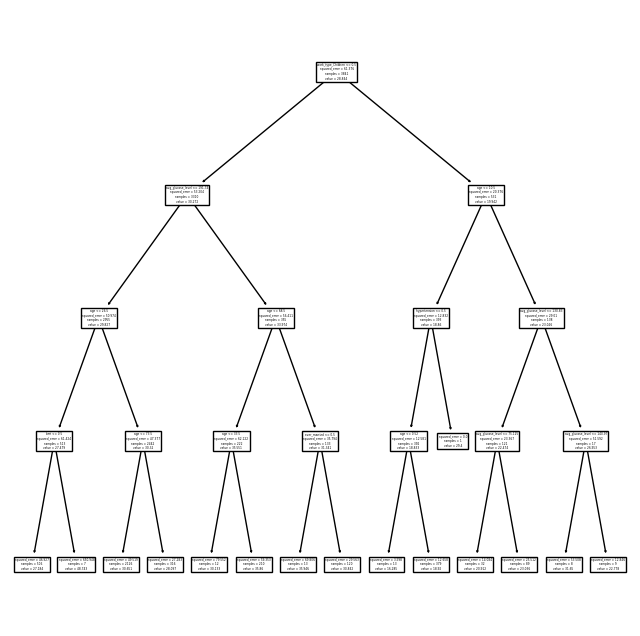

In [ ]:
ax = subplots(figsize=(8,8))[1]
plot_tree(rt2,
feature_names=X.columns,
ax=ax);
print(export_text(rt2,
feature_names=list(X.columns),
show_weights=True))

Dla zbioru testowego:

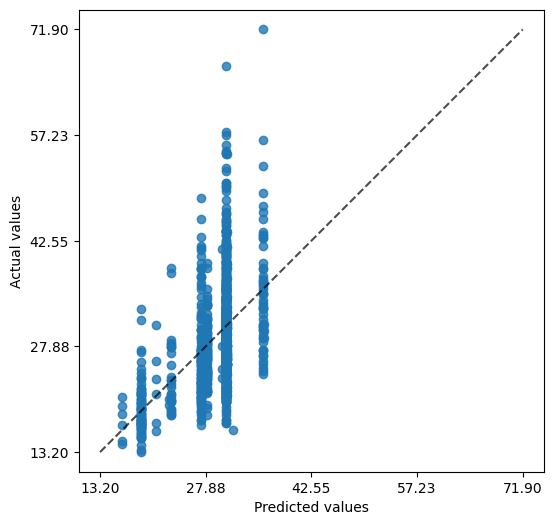

In [ ]:
ax = subplots(figsize=(6,6))[1]
PredictionErrorDisplay.from_predictions(
y_true=y_test2,
y_pred=rt2.predict(X_test2),
#y_true=y_train2,
#y_pred=dt.predict(X_train2),
kind="actual_vs_predicted",
ax=ax,
random_state=0,
)

Jest to wykres błędu predykcji. Wykres ten porównuje rzeczywiste wartości (oś OY) z przewidywaniami (oś OX). Przerywana linia to idealna predykcja, im bliższe są punkty tej linii, tym lepsza predykcja. Punkty pojawiają się do pewnego momentu, z większymi i mniejszymi odległościami od siebie, natomiast nie przekraczają wartości 42.55 na osi OX. Dla niektórych wartości rzeczywistych istnieje więcej niż jedna predykcja(wskazuje na to kształt układania się punktów).Wynika to też z faktu, że każde drzewo w lesie losowyum może dać nieco inną predykcję dla tych samych danych wejściowych.

Dla zbioru treningowego:

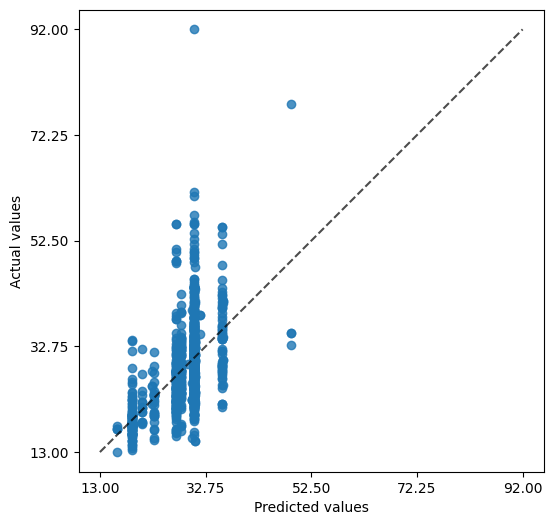

In [ ]:
ax = subplots(figsize=(6,6))[1]
PredictionErrorDisplay.from_predictions(
#y_true=y_test2,
#y_pred=rt2.predict(X_test2),
y_true=y_train2,
y_pred=rt2.predict(X_train2),
kind="actual_vs_predicted",
ax=ax,
random_state=0,
)

Do oceny modelu został wykorzystany mean_squared_error(), czyli błąd średniokwadratowy. Jest to średnia kwadratów błędów między wartościami przewidywanymi przez model a rzeczywistymi wartościami obserwowanymi. Oczywiście im mniejszy jest współczynnik MSE dla modelu, tym model jest lepszy.

#Zad12

Model lasu losowego.

In [ ]:
rf = RF(n_estimators=100,criterion='squared_error', max_depth = 4,min_samples_split = 2, min_samples_leaf=1,
        min_weight_fraction_leaf=0.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True,
        oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0,
        max_samples=None, max_features=1.0 )

rf.fit(X_train2, y_train2)
y_pred2 = rf.predict(X_test2)
mean_squared_error(y_test2, y_pred2)




46.01223484090368

In [ ]:
cw=[0]*X_train2.shape[1]   #lista wynikow kroswalicacji, 19- liczba cech w danych treningowych
max_features_values = range(1, X_train2.shape[1]+1)   # Rozważamy różne wartości max_features
cw_min = float('inf')  # najmniejszy wynik dokladnosci; srednia z walidacji krzyzowej
for  i, max_feat in enumerate(max_features_values):
    rf = RF(n_estimators=100, criterion='squared_error', max_depth=4, min_samples_split=2, min_samples_leaf=1,
            min_weight_fraction_leaf=0.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True,
            oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0,
            max_samples=None, max_features=max_feat)

    cw[i] = -cross_val_score(rf, X_train2, y_train2, cv=10, scoring='neg_mean_squared_error').mean()  # srednia dokladnosc
    if cw[i] <= cw_min:
        cw_min = cw[i]
        max_features_opt = max_feat

In [ ]:
cw_min

44.49251179296697

In [ ]:
max_features_opt

13

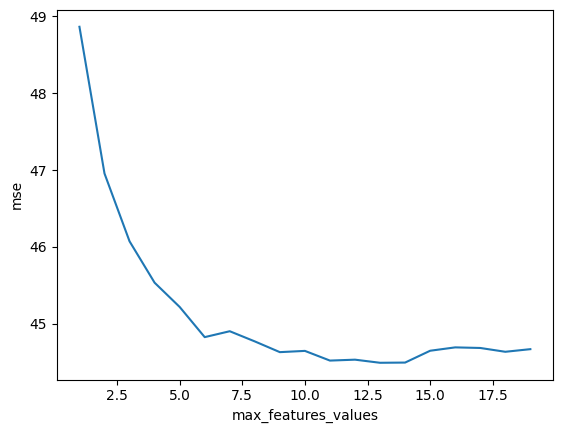

In [ ]:
plt.plot(max_features_values,cw)
plt.xlabel('max_features_values')
plt.ylabel('mse')
plt.show()

In [ ]:
rf2 = RF(n_estimators=100, criterion='squared_error', max_depth=4, min_samples_split=2, min_samples_leaf=1,
            min_weight_fraction_leaf=0.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True,
            oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0,
            max_samples=None, max_features=13)

rf2.fit(X_train2, y_train2)
y_pred2 = rf2.predict(X_test2)
mse_test =  mean_squared_error(y_test2, y_pred2)
y_pred2_train = rf2.predict(X_train2)
mse_train = mean_squared_error (y_train2, y_pred2_train)
print("Błąd średniokwadratowy na zbiorze testowym: ", mse_test)
print("Błąd średniokwadratowy na zbiorze treningowym: ", mse_train)


Błąd średniokwadratowy na zbiorze testowym:  46.35746815095973
Błąd średniokwadratowy na zbiorze treningowym:  42.60947549978802


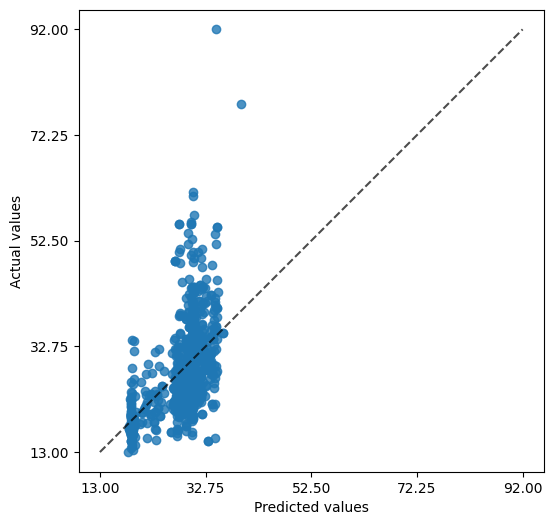

In [ ]:
ax = subplots(figsize=(6,6))[1]
PredictionErrorDisplay.from_predictions(
#y_true=y_test2,
#y_pred=rf2.predict(X_test2),
y_true=y_train2,
y_pred=rf2.predict(X_train2),
kind="actual_vs_predicted",
ax=ax,
random_state=0,
)

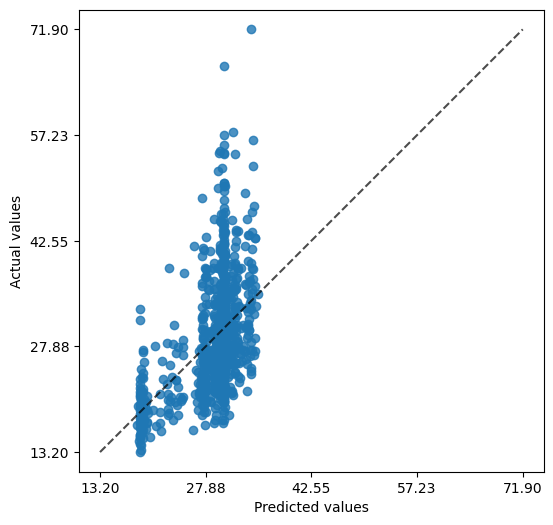

In [ ]:
ax = subplots(figsize=(6,6))[1]
PredictionErrorDisplay.from_predictions(
y_true=y_test2,
y_pred=rf2.predict(X_test2),
#y_true=y_train2,
#y_pred=rf2.predict(X_train2),
kind="actual_vs_predicted",
ax=ax,
random_state=0,
)

W tym zadaniu, co prawda nowy wynik mse po znalezieniu wartości hiperparametru max_features okazał się nieco gorszy, jednakże uważam, że na wykresie lepiej układają się punkty. Są faktycznie dwa szczególnie wyróżniające się punkty o wiele bardziej oddalone od pozostałych(które mogą wpływać na wartość mse), jednakże reszta bardziej się "zbiła". Jest widocznie bliżej przerywanej linii.

#Zad13

Model boostingowy.

In [ ]:
gbr = GBR(loss='squared_error', n_estimators=100, subsample=1.0, criterion='friedman_mse',
          min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=4, min_impurity_decrease=0.0,
          init=None, random_state=None, max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False,
          validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0, learning_rate=0.1 )
gbr.fit(X_train2, y_train2)
y_pred2 = gbr.predict(X_test2)
print(f'Wartość mse z podstawowymi hiperparametrami: ', mean_squared_error(y_test2, y_pred2))

Wartość mse z podstawowymi hiperparametrami:  46.431410013824966


In [ ]:
cw=[0]*20  #lista wynikow kroswalicacji
learning_rates = np.linspace(0.01, 1, num= 30 )  # Rozważamy różne wartości learning_rate
cw_min = float('inf')  # najmniejszy wynik dokladnosci; srednia z walidacji krzyzowej
for  lr in learning_rates:
    gbr = GBR(loss='squared_error', learning_rate= lr, n_estimators=100, subsample=1.0, criterion='friedman_mse',
            min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=4, min_impurity_decrease=0.0,
            init=None, random_state=None, max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False,
            validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

    cw[i] = -cross_val_score(gbr, X_train2, y_train2, cv=10, scoring='neg_mean_squared_error').mean()  # srednia dokladnosc
    if cw[i] <= cw_min:
        cw_min = cw[i]
        max_learning_rate_opt = lr

In [ ]:
max_learning_rate_opt

0.04413793103448276

In [ ]:
cw_min

44.95446469657954

In [ ]:
gbr2 = GBR(loss='squared_error', n_estimators=100, subsample=1.0, criterion='friedman_mse',
          min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=4, min_impurity_decrease=0.0,
          init=None, random_state=None, max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False,
          validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0, learning_rate = 0.04)
gbr2.fit(X_train2, y_train2)

y_pred2 = gbr2.predict(X_test2)
mse_test =  mean_squared_error(y_test2, y_pred2)
y_pred2_train = gbr2.predict(X_train2)
mse_train = mean_squared_error (y_train2, y_pred2_train)
print("Błąd średniokwadratowy na zbiorze testowym: ", mse_test)
print("Błąd średniokwadratowy na zbiorze treningowym: ", mse_train)

Błąd średniokwadratowy na zbiorze testowym:  46.133382626494395
Błąd średniokwadratowy na zbiorze treningowym:  38.88076531258769


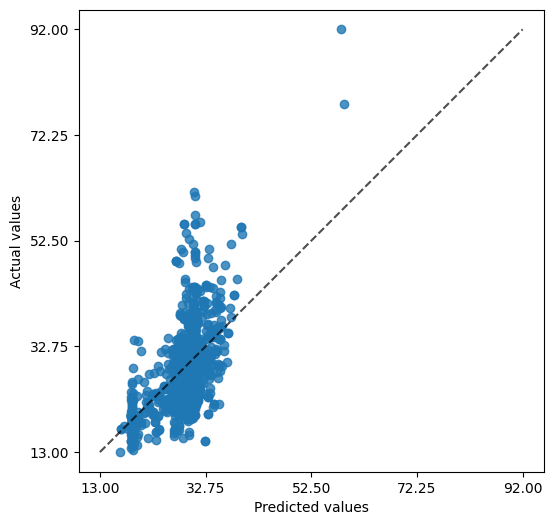

In [ ]:
ax = subplots(figsize=(6,6))[1]
PredictionErrorDisplay.from_predictions(
#y_true=y_test2,
#y_pred=rf2.predict(X_test2),
y_true=y_train2,
y_pred=gbr2.predict(X_train2),
kind="actual_vs_predicted",
ax=ax,
random_state=0,
)

Tu również mamy punkty bardziej zbliżone do siebie, z dwoma najbardziej oddalonymi punktami. Tym razem jednak wynik nieco się polepszył po zmianie hiperparametru learning_rate.
<br> Learning_rate α (odpowiednik parametru zwężania λ) oznacza po prostu jak szybko model się uczy. Wielkość modyfikacji jest kontrolowana przez szybkość uczenia się. Im niższa szybkość uczenia się, tym wolniej model się uczy. Zaletą wolniejszego uczenia się jest to, że model staje się solidniejszy i wydajniejszy. W uczeniu statystycznym modele, które uczą się powoli, działają lepiej. Jednak powolna nauka ma swoją cenę. Wytrenowanie modelu, co prowadzi nas do innego istotnego hiperparametru, zajmuje więcej czasu.

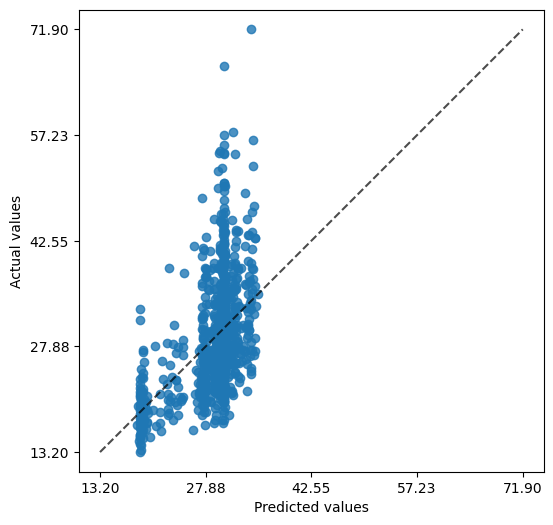

In [ ]:
ax = subplots(figsize=(6,6))[1]
PredictionErrorDisplay.from_predictions(
y_true=y_test2,
y_pred=rf2.predict(X_test2),
#y_true=y_train2,
#y_pred=rf2.predict(X_train2),
kind="actual_vs_predicted",
ax=ax,
random_state=0,
)

Porównując wyniki otrzymane w zad 11-13 mogę stwierdzić, że najlepiej wypadł model boostingowy, następnie za nim model lasu losowego i najsłabiej przy użyciu drzewa regresyjnego, uzyskując kolejno od najmniejszego do największego błędu średniokwadratowego. Różnica była naprawdę niewielka.

#**E) Wnioski końcowe**

Podczas robienia powyższych zadań zapoznałam się z drzewami losowymi. Jest to popularna metoda uczenia nadzorowanego, wykorzystywana regresji oraz klasyfikacji. Jej największą zaletą jest łatwość interpretacji oraz wizualizacji wyników. Za pomocą drzewa klasyfikacyjnego dokonałam oceny, czy pacjent z konkretnymi cechami może dostać udar, czy raczej nie ma ku temu mocnych przesłanek. Za pomcą drzewa regresyjnego dokonałam predykcji wskaźnika BMI. W ostatnich zadaniach zapoznałam się również z dwoma modelami- lasu losowego oraz boostingowego. Przy okazji dowiedziałam się, że warto znajdować w procesie np kroswalidacj optymalne wartości hiperparametrów danych modeli, w celu uzyskania lepszych wyników. Zobaczyłam również, że można wykorzystać resampling gdy ma się do czynienia z niezbalansowanymi danymi i również uzyskać lepsze rezultaty. Praktycznie również wykorzystałam macierz pomyłek do zobrazowania wniosków.